# Harilikud diferentsiaalvõrrandid

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 7.02.2019</div>
<div style="display:none">
$\renewcommand{\vec}{\boldsymbol}$
$\newcommand{\erf}{\mathop{\rm erf}\nolimits}$
$\newcommand{\mod}{\mathop{\rm mod}\nolimits}$
</div>

In [1]:
# üldised vahendid ja seadistused
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sympy import *
init_printing()

def harrow(x, y, p): # horis. nool pikkusega p alates punktist (x,y)
    plt.annotate('', xy=(x + p, y), xytext=(x, y),
             arrowprops=dict(arrowstyle='-|>', color='black') )

In [2]:
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 12
rcParams['axes.prop_cycle'] = plt.cycler('color', 'bgr')
rcParams['mathtext.fontset'] = 'cm'

## Sissejuhatus

Füüsikaseadused väljendavad looduse põhjuslikkust, mis avaldub reeglina füüsikalise seisundi *pidevas* (ajalises ja ruumilises) muutumises. Algebraline võrrand (nt $x=at^2/2$) suudab reeglina kirjeldada vaid *spetsiifilist* seisundit või trajektoori, mitte aga *kõiki võimalikke* liikumisi. Pidevust väljendab tuletise olemasolu (aja- või ruumikoordinaadi järgi). Vaid piisavalt kõrget järku tuletiste kaasamine võimaldab füüsikaseaduse formuleerida üldiselt. Näiteks punktmassi mehaanika üldiseks formuleerimiseks on vaja teist järku tuletist (Newtoni II seadus): $$m\frac{d^2x}{dt^2}=F(x,t)\quad\text{ehk}\quad m\ddot x=F(x,t).$$ Seda nimetatakse *harilikuks diferentsiaalvõrrandiks* (DV), sest sõltumatuid muutujaid on vaid üks ($t$). Kõige üldisemal kujul on $n$-järku harilik DV üles kirjutatav kujul $$F\left(t,y,\frac{dy}{dt},\ldots,\frac{d^ny}{dt^n}\right)=0,$$ kus $F$ on teadaolev funktsioon ja otsitavaks on $y(t)$.

Et DV lahendite perest üht kindlat liikumist (*erilahendit*) välja eraldada, tuleb liikumist kitsendada, tüüpiliselt *algtingimuste* näitamise teel. Kuni $n$-järku tuletisi sisaldav diferentsiaalvõrrand vajab $n$ algtingimust. Mõnikord õnnestub DV analüütiliselt integreerida (arvestamata algingimusi), andes tulemuseks *üldlahendi*. Viimane on põhimõtteliselt juba algebraline seos, mis sisaldab $n$ *integreerimiskonstanti*, mis tuleb jällegi elimineerida algtingimuste kaudu.

## Analüütiline integreerimine (SymPy)

Võtame näitena pendli võnkumise, kus taastav jõud (raskus- või elastsusjõud) on võrdeline pendli kõrvalekaldega $x$ tasakaaluasendist. Seega $m\ddot x=F(x)=-kx$ ehk $\ddot x+\omega^2x=0$, kus $\omega^2=k/m$. Sedavõrd lihtsa võrrandi saab lahendada anüütiliselt.

DV lahendamiseks SymPy abil peame esmalt defineerima muutujad `t` ja `w`, mis esindaksid vastavaid matemaatilisi sümboleid (aeg $t$ ja parameeter $\omega$) ning muutuja `x`, mis esindaks koordinaati $x(t)$ kui funktsiooni ajast. Sümboli $\omega$ defineerime kohe reaalarvulise suurusena, et vältida kompleks-kujul lahendit. Nende baasil konstrueerime diferentsiaalvõrrandi, mille saab seejärel lahendada käsuga `dsolve`.

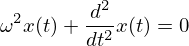

In [3]:
t = Symbol('t')   # aeg (sõltumatu muutuja)
w = Symbol('omega', positive=True)
x = Function('x') # koordinaat (ajast sõltuv)
võrrand = Eq(x(t).diff(t,2) + w**2 * x(t), 0)
võrrand

In [4]:
üldlahend = dsolve(võrrand, x(t))
üldlahend

Siin $C_1$ ja $C_2$ on integreerimiskonstandid. Erilahendi saamiseks tuleb need fikseerida algtingimustega. Kuna võrrand oli 2. järku, siis algtingimusi (nagu ka integreerimiskonstante) on 2 tükki, näiteks: alghetkel ($t=0$) pendli kõrvalekalle on maksimaalne (amplituud $A$) ja algkiirus null. Funktsioon `dsolve` tagastab võrduse (`sympy.Equality`), mille vasaku ja parema poole saab eraldi kätte atribuutidega `lhs` (*left hand side*) ja `rhs` (*right hand side*). Kombineerides viimast algtingimustega, saab koostada lineaarvõrrandisüsteemi integreerimiskonstantide määramiseks:

In [5]:
var('A,C1,C2')
avaldis = üldlahend.rhs
algting = Eq(avaldis.subs(t,0), A), Eq(avaldis.diff(t).subs(t,0), 0)
algting

In [6]:
konst = solve(algting, (C1,C2) )
konst

Viimaks olemegi kätte saanud DV erilahendi, mis tuleb ootuspärane:

In [6]:
erilahend = üldlahend.subs(konst)
erilahend

Järgmise, ikka veel analüütiliselt lahenduva näitena vaatleme objekti vertikaalset liikumist raskusjõu mõjul, kus keskkonna takistus on võrdeline kiirusega (vt [Stokes'i seadus](https://en.wikipedia.org/wiki/Stokes%27s_law)). Liikumisvõrrand on niisiis $$m\ddot x=mg-\eta\dot x$$ ehk $$\ddot x+k\dot x-g=0,$$ kus $k=\eta/m$.

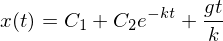

In [7]:
t = Symbol('t')
k,g = symbols('k,g', positive=True)
x = Function('x')
üldlahend = dsolve(x(t).diff(t,2) + k*x(t).diff(t) - g, x(t))
üldlahend

Oletagem, et alghetkel nii osakese koordinaat kui ka kiirus olid võrdsed nulliga:

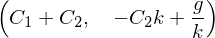

In [8]:
var('C1,C2')
avaldis = üldlahend.rhs
algting = avaldis.subs(t,0), avaldis.diff(t).subs(t,0)
algting

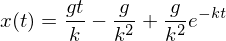

In [9]:
konst = solve( algting, (C1,C2) )
erilahend = üldlahend.subs(konst)
erilahend

Liikumise iseloomu tuvastamiseks piisab, kui muuta $t$ ja $x$ mastaape nii, et konstandid $g$ ja $k$ omandavad ühikulise väärtuse:

In [10]:
norm = erilahend.subs(g, 1).subs(k, 1)
norm

Nagu võis oodata, objekt saavutab mõne aja pärast konstantse piirkiiruse, mille juures raskusjõud ja keskkonna hõõrdetakistus saavad võrdseks:

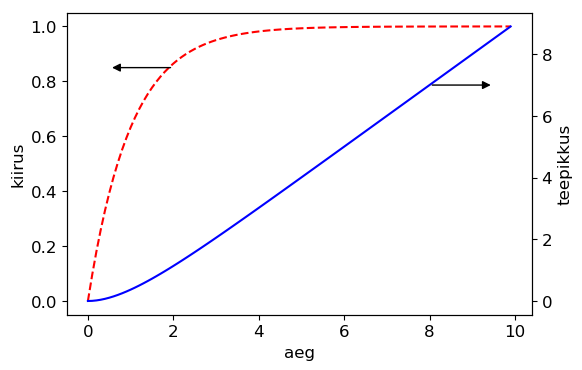

In [11]:
x = lambdify(t, norm.rhs)
v = lambdify(t, norm.rhs.diff(t))

T = np.arange(0, 10, 0.1)
plt.plot(T, v(T), 'r--')
plt.xlabel('aeg')
plt.ylabel('kiirus')
harrow(2, 0.85, -1.5)
plt.gca().twinx()
plt.plot(T, x(T), 'b-')
plt.ylabel('teepikkus')
harrow(8, 7, 1.5)
plt.show()

## Diferentsiaalvõrrandite süsteem normaalkujul

Harilike diferentsiaalvõrrandite süsteem (DVS) on põhimõtteliselt alati teisendatav kujule
\begin{equation}
\begin{cases} \frac{dy_1}{dt}=f_1(t,y_1,y_2,\ldots)\\ \frac{dy_2}{dt}=f_2(t,y_1,y_2,\ldots)\\ \quad\vdots \\ \frac{dy_n}{dt}=f_n(t,y_1,y_2,\ldots)\end{cases},\qquad(1)
\end{equation}
kus $y_1,y_2,\ldots, y_n$ on sõltuvad muutujad ja $f_1,f_2,\ldots,f_n$ on teadaolevad funktsioonid. Sõltuvaid muutujaid võib vaadelda vektorina $\vec{y}=(y_1,\ldots,y_n)$, samuti funktsioonid $f_1,\ldots,f_n$ võib kokku võtta ühte vektorfunktsiooni $\vec{f}$, nii et terve DVS-i saab esitada üheainsa vektorvõrrandiga $d\vec{y}/dt=\vec{f}(t,\vec{y})$. DVS-ga kaasnevad algtingimused kujul $\vec{y}(t_0)=\vec{y}_0$.

Ka üksik, kõrgemaid tuletisi sisaldav harilik DV on esitatav kujul (1). Näiteks äsjavaadeldud harmoonilise liikumise võrrand $\ddot x=-\omega^2x$ teiseneb süsteemiks $$\begin{cases} \frac{dv}{dt}=-\omega^2x\\ \frac{dx}{dt}=v\end{cases}$$kus sõltuvad muutujad on tähistatud $x$ ja $v$ (koordinaat ja kiirus).

## Numbriline integreerimine

Normaalkujule viidud DVS-i numbriline lahendamine on põhimõtteliselt hästi lihtne: valime piisavalt väikese sammu $h$ ja arvutame sõltuvate muutujate väärtused järk-järgult punktides $t_i=t_0+ih$: $$\vec{y}_{i+1}=\vec{y}_i+h\vec{f}(t_i,\vec{y}_i),$$
alustades algtingimusega antud väärtusest $\vec{y}(t_0)=\vec{y}_0$. Seda protseduuri nimetatakse [Euleri meetodiks](http://en.wikipedia.org/wiki/Euler_method). See meetod on äärmiselt ebaefektiivne ja kohati [numbriliselt ebastabiilne](https://en.wikipedia.org/wiki/Numerical_stability). Teoreetiliselt, vajaliku täpsuse saavutamiseks tuleks siin lihtsalt samm $h$ valida piisavalt väike, kuid sel juhul hakkab tulemuse täpsust piirama juba arvuti ujukomaarvude täpsus (ümardusviga). Keerukamate meetodite korral ei pea sammu tegema väga väikeseks. Tuntud fikseeritud sammuga meetod on [Runge-Kutta](http://en.wikipedia.org/wiki/Runge–Kutta_methods) meetod, mille puhul: $$\vec{y}_{i+1}=\vec{y}_i+\frac{h}{6}(\vec{k}_1+2\vec{k}_2+2\vec{k}_3+\vec{k}_4),$$
kus
\begin{align*}
\vec{k}_1 &= \vec{f}(t_i,\vec{y}_i),\\
\vec{k}_2 &= \vec{f}\left(t_i+\frac{h}{2}, \vec{y}_i+h\frac{\vec{k}_1}{2}\right),\\
\vec{k}_3 &= \vec{f}\left(t_i+\frac{h}{2}, \vec{y}_i+h\frac{\vec{k}_2}{2}\right),\\
\vec{k}_4 &= \vec{f}(t_i+h,\vec{y}_i+h\vec{k}_3).
\end{align*}
See meetod on juba 4. järku, mis tähendab, et $\vec{y}_i$ viga kasvab võrdeliselt $h^4$-ga. Võrdluseks, Euleri meetod on 1. järku.

Nimetatud algoritmi saab võrdlemisi lihtsasti täiendada nii, et igal sammul leitakse mitte ainult $y_{n+1}$, vaid ka selle veahinnang. Viimase alusel saab jooksvalt varieerida sammu $h$ suurust, nii et see on enam-vähem kooskõlas lahendi muutumise kiirusega. Üks populaarsemaid on [Dormand–Prince'i meetod](https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method), mille realiseerib `scipy.integrate.RK45`.

Universaalse liidesena harilike DVS-ide lahendamiseks on ette nähtud `scipy.integrate.solve_ivp` (*solve initial value problem*), millele integreerimisalgoritmi nime saab anda nimelise parameetrina `method` (vaikimisi `RK45`). Lisaks DVS-ile tuleb anda ennikuna ajavahemiku piirid ja algseisundi vektor.

Vaatleme näitena mürsu ballistilist liikumist, kus võetakse arvesse ka õhutakistust. Siin sõltumatuks muutujaks on aeg $t$, sõltuvateks muutujateks on aga kaugus $x$, kõrgus $h$, kiirus $v$ ning kiirusvektori ja horisontaalsihi vaheline nurk $\alpha$. Newtoni seaduste abil saame mürsu liikumise kirjeldamiseks DVS-i $$\begin{align} \frac{dx}{dt} &= v\cos\alpha\\ \frac{dh}{dt} &= v\sin\alpha\\ \frac{dv}{dt} &= -\frac{F_\text{tak}}{M}-g\sin\alpha \\ \frac{d\alpha}{dt} &=-\frac{g\cos\alpha}{v} \end{align}$$ kus $g$ on raskuskiirendus, $M$ on mürsu mass ja $F_\text{tak}$ on õhutakistus. Viimase loeme võrdeliseks kiiruse ruuduga ja õhu tihedusega. Katse-eksituse meetodil võib veenduda, et antud parameetrite korral kujuneb lennu kestus veidi alla 30 s. Hiljem sujuva graafiku saamiseks nõuame, et ajasamm ei oleks suurem kui 0,1 s.

Mõnikord pakub huvi, millisel täpsel ajahetkel süsteemi arengu käigus leiab aset mõni spetsiaalne sündmus, näiteks mürsu jõudmine maksimaalsele kõrgusele või kukkumine maapinnale. `solve_ivp` suudab seda detekteerida. Selleks tuleb iga sündmuse jaoks defineerida funktsioon, mis muudab oma märki parajasti sündmuse toimumise hetkel (teiste sõnadega, tagastab sel hetkel nulli). Kui lisada selle funktsiooni külge veel atribuut `terminal` väärtusega `True`, siis lahendamine katkestatakse selle sündmuse detekteerimisel (pole ju mõtet arvutamist jätkata, kui mürsk on juba "maapinnast läbi kukkunud").

In [12]:
from scipy.constants import g, degree as deg
from scipy.integrate import solve_ivp
M = 20. # mürsu mass [kg]
L = 0.15 # mürsu karakteerne mõõde [m] õhutakistuse valemi jaoks
# õhu tihedus [kg/m3] kui funktsioon kõrgusest [m]
rho = lambda h: 1.3 * np.exp(-h/8000.)
# õhutakistus [N] kui funktsioon kiirusest [m/s] ja kõrgusest [m]
Ftak = lambda v, h: L**2 * rho(h) * v**2

# diferentsiaalvõrrandite süsteem ühe vektorfunktsioonina
def DVS(t, y):
    x, h, v, α = y # eraldame vektori komponendid
    return [
        v * np.cos(α),
        v * np.sin(α),
        -Ftak(v, h) / M - g * np.sin(α),
        -g * np.cos(α) / v
    ]

y0 = (0, 1, 1500, 35*deg) # algtingimuste vektor

# spetsiaalseid sündmusi detekteerivad funktsioonid
kõrgeim = lambda t, y: y[3]
maapind = lambda t, y: y[1]
maapind.terminal = True

lahend = solve_ivp(DVS, (0, 300), y0, max_step=0.1, events=(kõrgeim,maapind) )
print(lahend.t.shape)
print(lahend.y.shape)
print(lahend.t_events)  # millal sündmused aset leidsid?

(285,)
(4, 285)
[array([9.07372698]), array([27.85953157])]


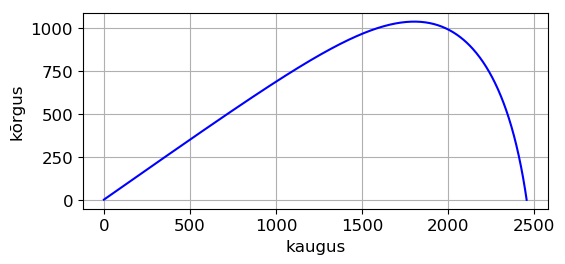

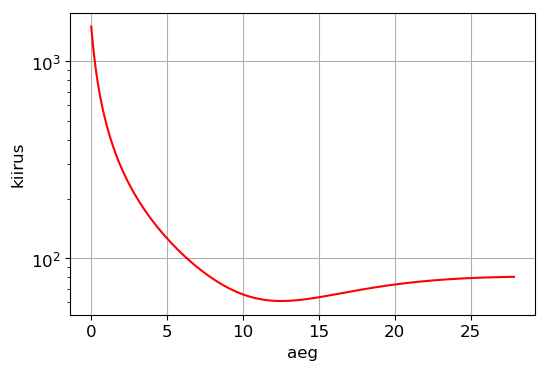

In [11]:
X, H, V, A = lahend.y
plt.axes(aspect = 1)
plt.plot(X, H, 'b-')
plt.xlabel('kaugus')
plt.ylabel('kõrgus')
plt.grid()
plt.show()

plt.plot(lahend.t, V, 'r-')
plt.yscale('log')
plt.xlabel('aeg')
plt.ylabel('kiirus')
plt.grid()
plt.show()